# Random Forest Regression

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [10]:
df = pd.read_csv('energydata_complete.csv')
print("Shape of df:", df.shape)
df.head()

Shape of df: (19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Preprocessing and Feature Engineering

In [11]:
df['date'] = pd.to_datetime(df['date'])

df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop(columns=['rv1', 'rv2'])

target = 'Appliances'
features = [col for col in df.columns if col not in ['date', target]]


In [12]:
df.isnull().sum().sort_values(ascending=False)

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,19735,2016-03-20 05:30:00,2016-01-11 17:00:00,2016-02-14 23:15:00,2016-03-20 05:30:00,2016-04-23 11:45:00,2016-05-27 18:00:00,NaN
Appliances,19735.0,97.694958,10.0,50.0,60.0,100.0,1080.0,102.524891
lights,19735.0,3.801875,0.0,0.0,0.0,0.0,70.0,7.935988
T1,19735.0,21.686571,16.79,20.76,21.6,22.6,26.26,1.606066
RH_1,19735.0,40.259739,27.023333,37.333333,39.656667,43.066667,63.36,3.979299
T2,19735.0,20.341219,16.1,18.79,20.0,21.5,29.856667,2.192974
RH_2,19735.0,40.42042,20.463333,37.9,40.5,43.26,56.026667,4.069813
T3,19735.0,22.267611,17.2,20.79,22.1,23.29,29.236,2.006111
RH_3,19735.0,39.2425,28.766667,36.9,38.53,41.76,50.163333,3.254576
T4,19735.0,20.855335,15.1,19.53,20.666667,22.1,26.2,2.042884


Values across all columns fall within expected range, except for T6 and RH_6 which show significantly lower min values and RH_5 which shows a high max value.

## Exploratory Data Analysis

#### Distribution of Appliance Energy Consumption

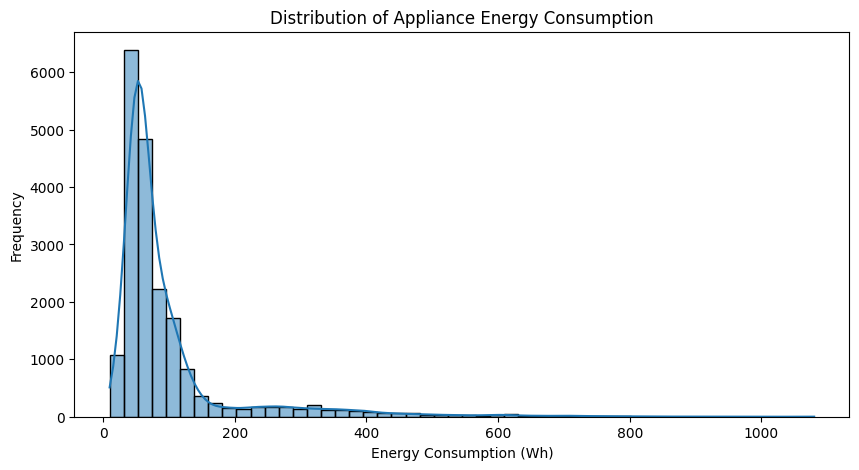

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Appliances'], bins=50, kde=True)
plt.title('Distribution of Appliance Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

The distribution of data is right-skewed. This means most consumption values are below 200 Wh, but there are spikes in energy consumption.

#### Average Energy Use by Hour of Day

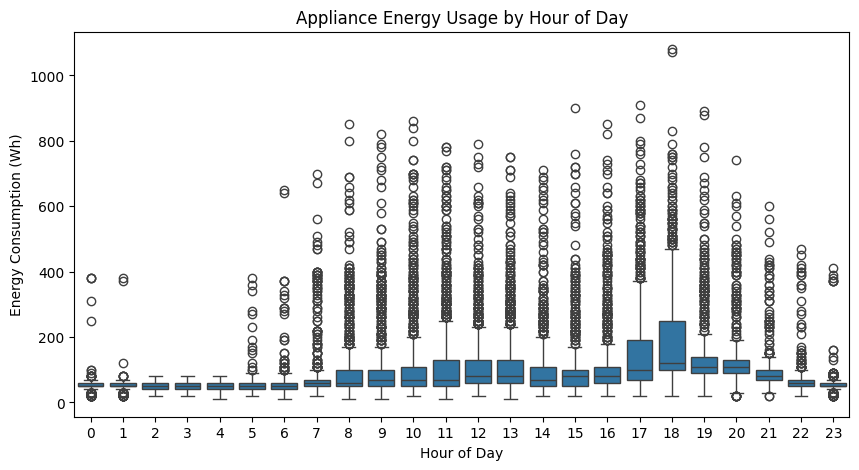

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='Appliances', data=df)
plt.title('Appliance Energy Usage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

Usage starts to go up starting at 6 AM, with the peak at 6 PM.

#### Average Energy Use by Day of Week

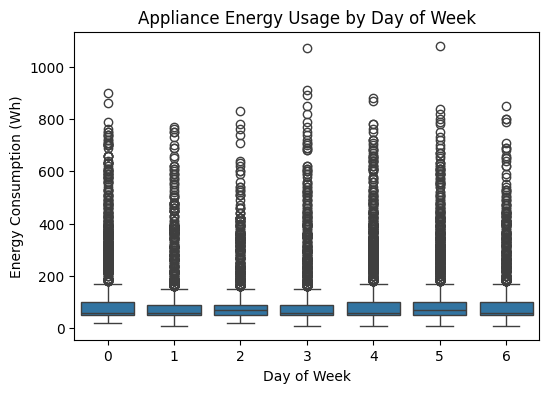

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='day_of_week', y='Appliances', data=df)
plt.title('Appliance Energy Usage by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

No visible difference in usage across days of the week.

#### Weekend vs Weekday Usage

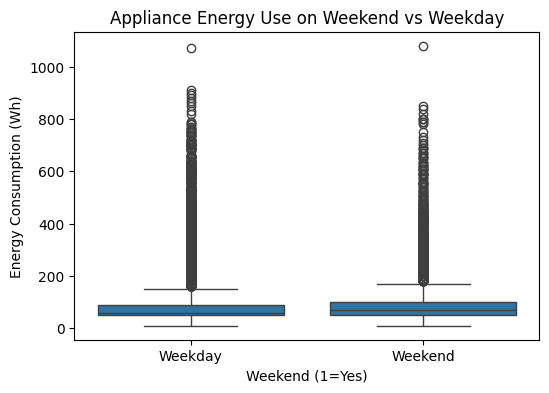

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_weekend', y='Appliances', data=df)
plt.title('Appliance Energy Use on Weekend vs Weekday')
plt.xlabel('Weekend (1=Yes)')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

Similarly to days of the week, usage during weekdays compared to weekends appear to be similar.

#### Correlation Matrix

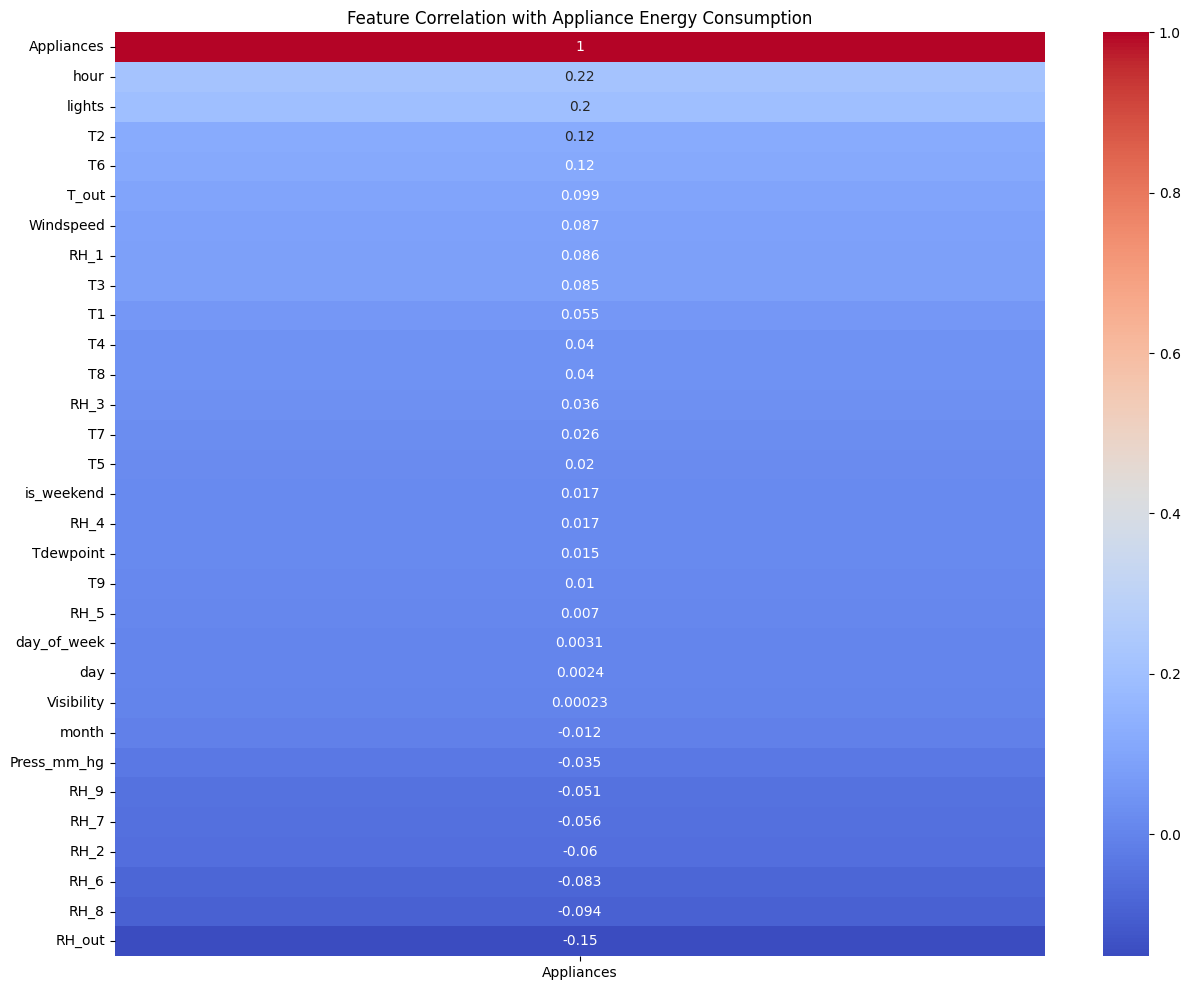

In [19]:
plt.figure(figsize=(15, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Appliances']].sort_values(by='Appliances', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Appliance Energy Consumption')
plt.show()

Based on the correlation map, the top correlators are *hour*, *lights*, *T2*, *T6*, and *RH_out*.

## Split data and train model

#### Splitting the dataframe into training and test sets

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train Random Forest Regressor

In [22]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Make predictions and evaluate

In [23]:
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 30.81
RMSE: 65.99
R²: 0.565


This shows the model predictions are off by 30.81 Wh and the model itself only explains 56% of the variance in energy use.

## Train model on Log-transformed target

#### Log-transform target

In [24]:
y_log = np.log1p(df[target])

#### Split data again

In [25]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

#### Re-train model

In [26]:
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log.fit(X_train, y_train_log)

RandomForestRegressor(random_state=42)

In [27]:
y_pred_log = rf_log.predict(X_test)
y_pred_inv = np.expm1(y_pred_log)
y_test_inv = np.expm1(y_test_log)

#### Recalculate metrics

In [28]:
mae_log = mean_absolute_error(y_test_inv, y_pred_inv)
rmse_log = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2_log = r2_score(y_test_inv, y_pred_inv)

print(f"MAE (log-transformed): {mae_log:.2f}")
print(f"RMSE (log-transformed): {rmse_log:.2f}")
print(f"R² (log-transformed): {r2_log:.3f}")

MAE (log-transformed): 28.37
RMSE (log-transformed): 67.67
R² (log-transformed): 0.542


The model trained on the log-transformed target performs worse than the original model (54% vs 56%).

## Compare model predictions to actual values

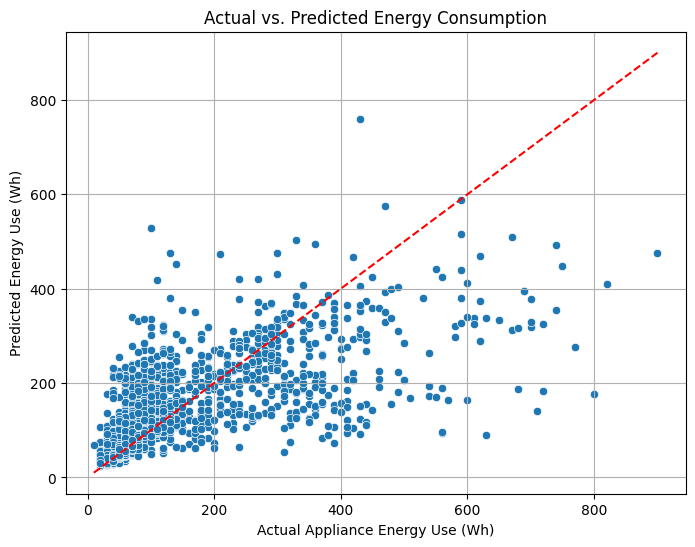

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Appliance Energy Use (Wh)')
plt.ylabel('Predicted Energy Use (Wh)')
plt.title('Actual vs. Predicted Energy Consumption')
plt.grid(True)
plt.show()

## Analyze feature importance

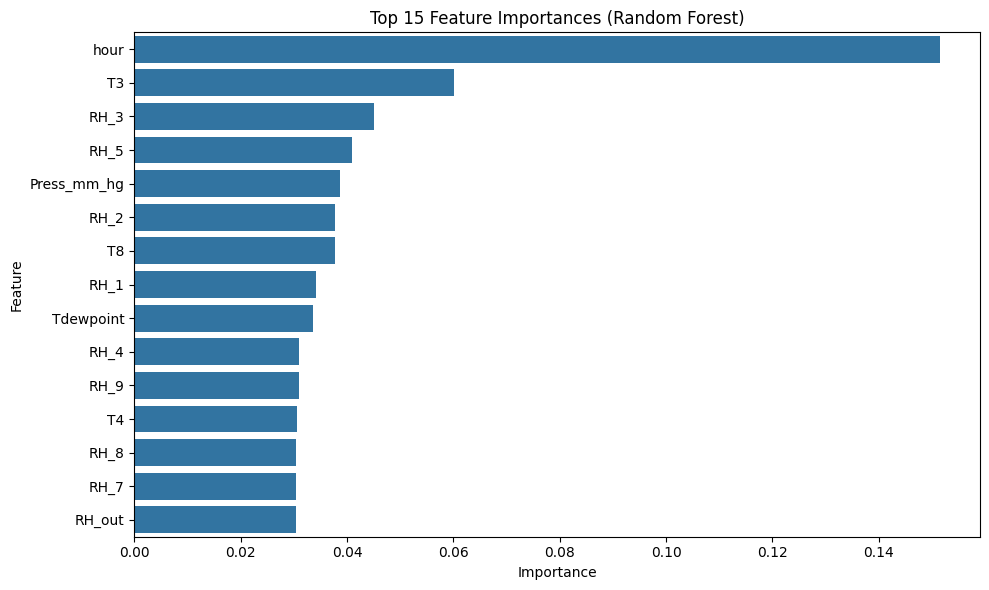

In [31]:
importances = rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# XGBoost

## Train model using XGBoost

#### Import and train model using XGBoost

In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

#### Make predictions and evaluate

In [33]:
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.3f}")

XGBoost MAE: 37.28
XGBoost RMSE: 73.35
XGBoost R²: 0.462


## Analyze feature importance

<Figure size 1000x600 with 0 Axes>

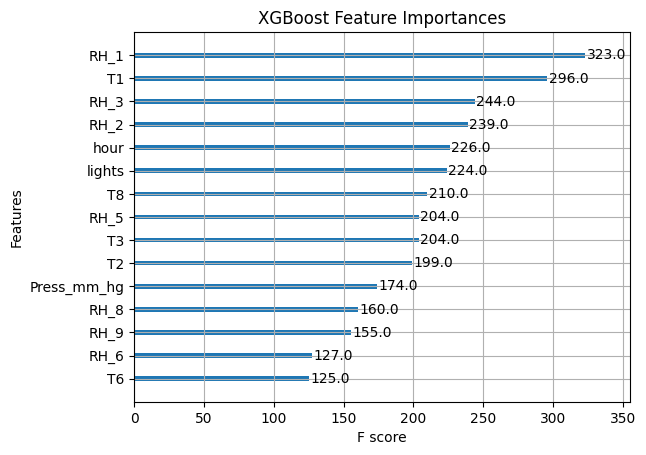

In [34]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb, max_num_features=15)
plt.title("XGBoost Feature Importances")
plt.show()

## Tune XGBoost with GridSearchCV

#### Grid search

In [43]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             scoring='neg_mean_squared_error', verbose=1)

#### Obtain best model and evaluate

In [44]:
best_xgb = grid_search.best_estimator_

y_pred_best = best_xgb.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best XGBoost Params:", grid_search.best_params_)
print(f"Tuned XGBoost MAE: {mae_best:.2f}")
print(f"Tuned XGBoost RMSE: {rmse_best:.2f}")
print(f"Tuned XGBoost R²: {r2_best:.3f}")

Best XGBoost Params: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1}
Tuned XGBoost MAE: 27.07
Tuned XGBoost RMSE: 59.23
Tuned XGBoost R²: 0.667


## Advanced feature engineering

#### Sort by date

In [45]:
df = df.sort_values('date').reset_index(drop=True)

#### Add lag features

In [46]:
df['appliances_lag_1'] = df['Appliances'].shift(1)
df['appliances_lag_3'] = df['Appliances'].shift(3)
df['appliances_lag_6'] = df['Appliances'].shift(6)
df['appliances_lag_12'] = df['Appliances'].shift(12)
df['appliances_lag_24'] = df['Appliances'].shift(24)

#### Add rolling average features

In [47]:
df['appliances_roll_6'] = df['Appliances'].rolling(window=6).mean()
df['appliances_roll_12'] = df['Appliances'].rolling(window=12).mean()

df['appliances_std_6'] = df['Appliances'].rolling(window=6).std()
df['appliances_delta'] = df['Appliances'] - df['appliances_lag_1']

#### Drop initial NaN rows

In [48]:
df = df.dropna().reset_index(drop=True)

#### Categorical encode for hour

In [49]:
df = pd.get_dummies(df, columns=['hour'], drop_first=True)

#### Update feature set and re-split

In [50]:
features = [col for col in df.columns if col not in ['date', 'Appliances']]
X = df[features]
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Retrain XGBoost

In [51]:
best_xgb.fit(X_train, y_train)
y_pred_new = best_xgb.predict(X_test)

mae_new = mean_absolute_error(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_test, y_pred_new)

print(f"MAE (w/ lag/rolling): {mae_new:.2f}")
print(f"RMSE (w/ lag/rolling): {rmse_new:.2f}")
print(f"R² (w/ lag/rolling): {r2_new:.3f}")

MAE (w/ lag/rolling): 2.64
RMSE (w/ lag/rolling): 7.63
R² (w/ lag/rolling): 0.994


The R-squared value is the highest at 99.40%. This was obtained by giving the model memory, allowing it to learn that if energy use was high a couple of minutes ago, it is likely to still be high at the present. Hours were also treated as a categorical variable which allowed them to be used to interpret daily energy cycles.

More importantly, date was sorted before .shift() and .rolling() were applied to make sure the model wasn't peeking into future data.

To summarize, the model was fed temporal features that captured recent trends, rolling behavior, and lagged values.

## Visualize XGBoost model

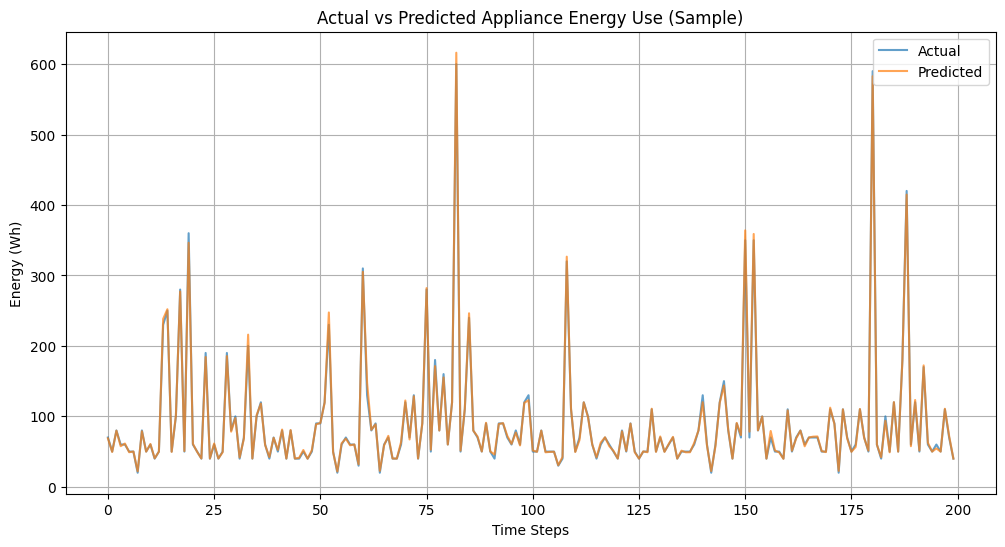

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:200], label='Actual', alpha=0.7)
plt.plot(y_pred_new[:200], label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Appliance Energy Use (Sample)")
plt.xlabel("Time Steps")
plt.ylabel("Energy (Wh)")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
!pip freeze > requirements.txt